In [177]:
from __future__ import print_function
import mlbgame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# Allie Surina
## Capstone Project: Predicting Injuries from MLB Game & Disabled List Data

## Project Goal: To find and analyze game log data for MLB games from 2000 - 2016, along with whether a player was placed on the Disabled List after a particular game (i.e. he was injured during his previous game), and predict:
- ## (a) whether an injury will happen in a game.
- ## (b) whether a player will be injured in the next game.

### The 

In [69]:
# # Make a list of the years of this data analysis
# years_wanted = np.arange(2000,2018,1)

# # Get a list of all games for each year from 2000 to 2017:
# game_list = []
# for year in years_wanted:
#     year_games = mlbgame.games(year)
#     game_list = mlbgame.combine_games(year_games)

XMLSyntaxError: Document is empty, line 1, column 1 (scoreboard.xml, line 1)

# Game Logs from Retrosheet

The information used here was obtained free of
     charge from and is copyrighted by Retrosheet.  Interested
     parties may contact Retrosheet at "www.retrosheet.org".

    `Field(s)  Meaning
    1     Date in the form "yyyymmdd"
    2     Number of game:
             "0" -- a single game
             "1" -- the first game of a double (or triple) header
                    including seperate admission doubleheaders
             "2" -- the second game of a double (or triple) header
                    including seperate admission doubleheaders
             "3" -- the third game of a triple-header
             "A" -- the first game of a double-header involving 3 teams
             "B" -- the second game of a double-header involving 3 teams
    3     Day of week  ("Sun","Mon","Tue","Wed","Thu","Fri","Sat")
      4-5     Visiting team and league
    6     Visiting team game number
          For this and the home team game number, ties are counted as
          games and suspended games are counted from the starting
          rather than the ending date.
      7-8     Home team and league
        9     Home team game number
       10     Visiting team score (unquoted)
       11     Home Team score
       12     Length of game in outs (unquoted).  A full 9-inning game would
          have a 54 in this field.  If the home team won without batting
          in the bottom of the ninth, this field would contain a 51.
       13     Day/night indicator ("D" or "N")
       14     Completion information.  If the game was completed at a
          later date (either due to a suspension or an upheld protest)
          this field will include:
             "yyyymmdd,park,vs,hs,len" Where
          yyyymmdd -- the date the game was completed
          park -- the park ID where the game was completed
          vs -- the visitor score at the time of interruption
          hs -- the home score at the time of interruption
          len -- the length of the game in outs at time of interruption
          All the rest of the information in the record refers to the
          entire game.
       15     Forfeit information:
             "V" -- the game was forfeited to the visiting team
             "H" -- the game was forfeited to the home team
             "T" -- the game was ruled a no-decision
       16     Protest information:
             "P" -- the game was protested by an unidentified team
             "V" -- a disallowed protest was made by the visiting team
             "H" -- a disallowed protest was made by the home team
             "X" -- an upheld protest was made by the visiting team
             "Y" -- an upheld protest was made by the home team
          Note: two of these last four codes can appear in the field
          (if both teams protested the game).
       17     Park ID
       18     Attendance (unquoted)
           19     Time of game in minutes (unquoted)
       20     Visitingline scores.  For example:"010000(10)0x"
       21     Home line scores
              Would indicate a game where the home team scored a run in
              the second inning, ten in the seventh and didn't bat in the
              bottom of the ninth.
        22-38     Visiting team offensive statistics (unquoted) (in order):
       22          at-bats
       23          hits
       24          doubles
       25          triples
       26          homeruns
       27          RBI
       28          sacrifice hits.  This may include sacrifice flies for years prior to 1954 when sacrifice flies were allowed.
       29          sacrifice flies (since 1954)   
       30          hit-by-pitch
       31          walks
       32          intentional walks
       33          strikeouts
       34          stolen bases
       35          caught stealing
       36          grounded into double plays
       37          awarded first on catcher's interference
       38          left on base
             
     Visiting team pitching statistics (unquoted)(in order):
    39         pitchers used ( 1 means it was a complete game )
    40        individual earned runs
    41         team earned runs
    42         wild pitches
    43         balks
     Visiting team defensive statistics (unquoted) (in order):
     44        putouts.  Note: prior to 1931, this may not equal 3 times
                the number of innings pitched.  Prior to that, no
                putout was awarded when a runner was declared out for
                being hit by a batted ball.
      45       assists
      46       errors
      47       passed balls
      48       double plays
      49       triple plays
      Home team offensive statistics
       50          at-bats
       51          hits
       52          doubles
       53          triples
       54          homeruns
       55          RBI
       56          sacrifice hits.
       57          sacrifice flies (since 1954)   
       58          hit-by-pitch
       59          walks
       60          intentional walks
       61          strikeouts
       62          stolen bases
       63          caught stealing
       64          grounded into double plays
       65          awarded first on catcher's interference
       66          left on base
          Home team pitching statistics
        67         pitchers used ( 1 means it was a complete game )
        68        individual earned runs
        69         team earned runs
        70         wild pitches
        71         balks
    72-77     Home team defensive statistics
        72        putouts.  Note: prior to 1931, this may not equal 3 times
                    the number of innings pitched.  Prior to that, no
                    putout was awarded when a runner was declared out for
                    being hit by a batted ball.
          73       assists
          74       errors
          75       passed balls
          76       double plays
          77       triple plays


        78     Home plate umpire ID
        79    Home plate umpire name

    80-81     1B umpire ID and name
    82-83     2B umpire ID and name
    84-85     3B umpire ID and name
    86-87     LF umpire ID and name
    88-89     RF umpire ID and name
              If any umpire positions were not filled for a particular game
              the fields will be "","(none)".
    90-91     Visiting team manager ID and name
    92-93     Home team manager ID and name
    94-95     Winning pitcher ID and name
    96-97     Losing pitcher ID and name
    98-99     Saving pitcher ID and name--"","(none)" if none awarded
    100-101   Game Winning RBI batter ID and name--"","(none)" if none
              awarded
    102-103   Visiting starting pitcher ID and name
    104-105   Home starting pitcher ID and name

    106-132   Visiting starting players ID, name and defensive position,
              listed in the order (1-9) they appeared in the batting order.

    133-159   Home starting players ID, name and defensive position
              listed in the order (1-9) they appeared in the batting order.
      160     Additional information.  This is a grab-bag of informational
              items that might not warrant a field on their own.  The field 
              is alpha-numeric. Some items are represented by tokens such as:
                 "HTBF" -- home team batted first.
                 Note: if "HTBF" is specified it would be possible to see
                 something like "01002000x" in the visitor's line score.
              Changes in umpire positions during a game will also appear in 
              this field.  These will be in the form:
                 umpchange,inning,umpPosition,umpid with the latter three
                 repeated for each umpire.
              These changes occur with umpire injuries, late arrival of 
              umpires or changes from completion of suspended games. Details
              of suspended games are in field 14.
      161     Acquisition information:
                 "Y" -- we have the complete game
                 "N" -- we don't have any portion of the game
                 "D" -- the game was derived from box score and game story
                 "P" -- we have some portion of the game.  We may be missing
                        innings at the beginning, middle and end of the game.

    Missing fields will be NULL.`

In [334]:
files = ['GL2000.TXT', 'GL2001.TXT', 'GL2002.TXT', 'GL2003.TXT', 'GL2004.TXT', 'GL2005.TXT','GL2000.TXT',
        'GL2006.TXT','GL2007.TXT','GL2008.TXT','GL2009.TXT','GL2010.TXT','GL2011.TXT',
        'GL2012.TXT','GL2013.TXT','GL2014.TXT','GL2015.TXT','GL2016.TXT']
# Let's bring in one file and see what the outcome is:
year = 2000
for filey in files:
    temp_game_+str(year) = pd.read_csv(filey, header=None)
    temp_game_+str(year).columns = [
        'date','num_game','day','v_team','v_league','v_team_game_num',
        'h_team', 'h_league','h_team_game_num','v_team_score','h_team_score','game_length_outs',
        'day_night','when_complete','forfeit','protest','park_id', 'attendance',
        'time_game_min', 'v_line_scores','h_line_scores','v_at_bats','v_hits','v_doubles',
        'v_triples','v_homeruns','v_RBI','v_sac_hits', 'v_sac_files','v_hit_pitch',
        'v_walks', 'v_int_walks', 'v_strikeouts', 'v_stol_base', 'v_caught_steal', 'v_grnd_dbl_plays', 
        'v_awd_fst_catch_intf', 'v_left_on_base','v_pitchers','v_ind_earn_runs','v_team_earn_runs','v_wild_pitch',
        'v_balks','v_putouts','v_assists','v_errors','v_pass_balls','v_dbl_plays',
        'v_trp_plays','h_at_bats','h_hits','h_doubles', 'h_triples','h_homeruns',
        'h_RBI','h_sac_hits', 'h_sac_files','h_hit_pitch','h_walks', 'h_int_walks', 
        'h_strikeouts', 'h_stol_base', 'h_caught_steal','h_grnd_dbl_plays', 'h_awd_fst_catch_intf','h_left_on_base',
        12'h_pitchers','h_ind_earn_runs','h_team_earn_runs','h_wild_pitch','h_balks','h_putouts',
        'h_assists','h_errors','h_pass_balls','h_dbl_plays','h_trp_plays','h_plate_ump_id',
        'h_plate_ump_name','first_b_ump_id','first_b_ump_name','sec_b_ump_id','sec_b_ump_name','third_b_ump_id',
       (85) 'third_b_ump_name', 'lf_ump_id','lf_ump_name','rf_ump_id','rf_ump_name','v_mgr_id',
        'v_mgr_name','h_mgr_id','h_mgr_name','w_pitch_id','w_pitch"name','l_pitch_id',
        'l_pitch_name','sv_pitch_id','sv_pitch_name','game_win_rbi_bat_id','game_win_rbi_bat_name','v_start_pitch_id',
        'v_start_pitch_name', 'h_start_pitch_id', 'h_start_pitch_name', 'v_pl_1_id','v_pl_1_name', 'v_pl_1_pos',
        'v_pl_2_id','v_pl_2_name', 'v_pl_2_pos','v_pl_3_id','v_pl_3_name', 'v_pl_3_pos',
        'v_pl_4_id','v_pl_4_name', 'v_pl_4_pos','v_pl_5_id','v_pl_5_name', 'v_pl_5_pos',
        'v_pl_6_id','v_pl_6_name', 'v_pl_6_pos','v_pl_7_id','v_pl_7_name', 'v_pl_7_pos',
        'v_pl_8_id','v_pl_8_name', 'v_pl_8_pos','v_pl_9_id','v_pl_9_name', 'v_pl_9_pos',
        'h_pl_1_id','h_pl_1_name', 'h_pl_1_pos','h_pl_2_id','h_pl_2_name', 'h_pl_2_pos',
        'h_pl_3_id','h_pl_3_name', 'h_pl_3_pos','h_pl_4_id','h_pl_4_name', 'h_pl_4_pos',
        'h_pl_5_id','h_pl_5_name', 'h_pl_5_pos','h_pl_6_id','h_pl_6_name', 'h_pl_6_pos',
        'h_pl_7_id','h_pl_7_name', 'h_pl_7_pos','h_pl_8_id','h_pl_8_name', 'h_pl_8_pos',
        (157)'h_pl_9_id','h_pl_9_name', 'h_pl_9_pos',
        
        
        
    
temp_game_data = pd.read_csv('GL2000.TXT', header=None)
temp_game_data.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20000329,0,Wed,CHN,NL,1,NYN,NL,1,5,...,Todd Zeile,3,ordor001,Rey Ordonez,6,hampm001,Mike Hampton,1,NaN,Y
1,20000330,0,Thu,NYN,NL,2,CHN,NL,2,5,...,Jeff Huson,6,giraj001,Joe Girardi,2,farnk001,Kyle Farnsworth,1,NaN,Y
2,20000403,0,Mon,COL,NL,1,ATL,NL,1,0,...,Eddie Perez,2,weisw001,Walt Weiss,6,maddg002,Greg Maddux,1,NaN,Y
3,20000403,0,Mon,MIL,NL,1,CIN,NL,1,3,...,Aaron Boone,5,tuckm001,Michael Tucker,7,harnp001,Pete Harnisch,1,NaN,Y
4,20000403,0,Mon,SFN,NL,1,FLO,NL,1,4,...,Brant Brown,9,redmm001,Mike Redmond,2,ferna001,Alex Fernandez,1,NaN,Y


[]

In [74]:
year_games_2000 = mlbgame.games(2000)
games_2000 = mlbgame.combine_games(year_games_2000)

In [75]:
year_games_2001 = mlbgame.games(2001)
games_2001 = mlbgame.combine_games(year_games_2001)

In [76]:
year_games_2002 = mlbgame.games(2002)
games_2002 = mlbgame.combine_games(year_games_2002)

In [77]:
year_games_2003 = mlbgame.games(2003)
games_2003 = mlbgame.combine_games(year_games_2003)

In [78]:
year_games_2004 = mlbgame.games(2004)
games_2004 = mlbgame.combine_games(year_games_2004)

In [305]:
print(games_2004)

In [115]:
year_games_2005 = []
months_list = [1,2]
for item in months_list:
    temp_game = mlbgame.games(2005,item)
    if len(temp_game) != 0:
        year_games_2005.append(temp_game)
days = [1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19, 20,21,22,23,24,25,26,27,28,29,30,31]
games_march_2005 = []
for day in days:
    temp_game = mlbgame.games(2005,3,day)
    if len(temp_game) != 0:
        games_march_2005.append(temp_game)
year_games_2005.append(games_march_2005)
months_list2 = [4,5,6,7,8,9,10,11,12]
for item in months_list2:
    temp_game = mlbgame.games(2005,item)
    if len(temp_game) != 0:
        year_games_2005.append(temp_game)

In [117]:
games_2005 = mlbgame.combine_games(year_games_2005)

In [80]:
year_games_2006 = mlbgame.games(2006)
games_2006 = mlbgame.combine_games(year_games_2006)

In [81]:
year_games_2007 = mlbgame.games(2007)
games_2007 = mlbgame.combine_games(year_games_2007)

In [82]:
year_games_2008 = mlbgame.games(2008)
games_2008 = mlbgame.combine_games(year_games_2008)

In [83]:
year_games_2009 = mlbgame.games(2009)
games_2009 = mlbgame.combine_games(year_games_2009)

In [84]:
year_games_2010 = mlbgame.games(2010)
games_2010 = mlbgame.combine_games(year_games_2010)

In [85]:
year_games_2011 = mlbgame.games(2011)
games_2011 = mlbgame.combine_games(year_games_2011)

In [86]:
year_games_2012 = mlbgame.games(2012)
games_2012 = mlbgame.combine_games(year_games_2012)

In [87]:
year_games_2013 = mlbgame.games(2013)
games_2013 = mlbgame.combine_games(year_games_2013)

In [88]:
year_games_2014 = mlbgame.games(2014)
games_2014 = mlbgame.combine_games(year_games_2014)

In [89]:
year_games_2015 = mlbgame.games(2015)
games_2015 = mlbgame.combine_games(year_games_2015)

In [90]:
year_games_2016 = mlbgame.games(2016)
games_2016 = mlbgame.combine_games(year_games_2016)

In [91]:
year_games_2017 = mlbgame.games(2017)
games_2017 = mlbgame.combine_games(year_games_2017)

# Next Steps: Add all Games list together: all_seasons_games
* games_2000 + games_2001 + ... + games_2017
* Go back and create games_1999 if I want to add that since my injury  list contains that.


### Combine all the games_list for 2000 - 2017 into one long list to iterate for building a Pandas dataframe: all_seasons_games

In [276]:
# Create a list to hold all the seasons of games.
all_seasons_games = []
# Create a counter that will sum the length of individual lists for confirmation that it worked
length_counter = 0
# Create a list of all the lists to iterate 
games_lists_to_combine = [games_2000+games_2001+games_2002 +games_2003 +games_2004 +games_2005\
                         +games_2006 +games_2007 +games_2008 +games_2009 +games_2010\
                         +games_2011 +games_2012 +games_2013 +games_2014 +games_2015\
                         +games_2016 +games_2017]
# Use a for loop so that you don't end up with a list of lists
for game_list in games_lists_to_combine:
    length_counter += len(game_list)
    all_seasons_games = [item for item in all_seasons_games] + [thing for thing in game_list]

# Let's confirm that the length of the final list equals the sum of the lengths of sep lists
print(length_counter, len(all_seasons_games))

36518 36518


In [298]:
for game in all_seasons_games:
    print(game.date)
#     print(str(game.date).split()[0])
#     temp_game = {}
#     temp_game['game_date'] = 

2000-04-30 12:05:00
2000-04-30 12:05:00
2000-04-30 12:05:00
2000-04-30 12:35:00
2000-04-30 12:35:00
2000-04-30 12:35:00
2000-04-30 13:05:00
2000-04-30 13:05:00
2000-04-30 13:05:00
2000-04-30 13:20:00
2000-04-30 14:05:00
2000-04-30 15:05:00
2000-04-30 15:05:00
2000-04-30 15:10:00
2000-04-30 19:05:00
2000-07-11 19:35:00
2001-07-10 19:05:00
2002-06-11 18:05:00
2002-06-11 18:05:00
2002-06-11 18:05:00
2002-06-11 18:05:00
2002-06-11 18:05:00
2002-06-11 18:05:00
2002-06-11 18:15:00
2002-06-11 19:05:00
2002-06-11 19:05:00
2002-06-11 19:05:00
2002-06-11 19:05:00
2002-06-11 19:05:00
2002-06-11 21:05:00
2002-06-11 21:05:00
2002-06-11 21:05:00
2002-07-09 19:05:00
2003-07-15 19:05:00
2004-07-13 19:05:00


AttributeError: 'list' object has no attribute 'date'

In [287]:
#Start making a dictionary that will become the dataframe: 
game_info = []
for game in all_seasons_games:
    temp_game = {}
    temp_game['game_date'] = game.date
    temp_game['game_league'] = game.game_league
    temp_game['game_start_time'] = game.game_start_time
    temp_game['game_home_team'] = game.home_team
    temp_game['game_away_team'] = game.away_team
    temp_game['game_away_errors'] = game.away_team_errors
    temp_game['game_away_hits'] = game.away_team_hits
    temp_game['game_away_runs'] = game.away_team_runs
    temp_game['game_home_errors'] = game.home_team_errors
    temp_game['game_home_hits'] = game.home_team_hits
    temp_game['game_home_runs'] = game.home_team_runs
    temp_game['game_nice_score'] = game.nice_score
    temp_game['game_l_pitch_loss'] = game.l_pitcher_losses
    temp_game['game_w_pitch_loss'] = game.w_pitcher_losses    
    game_info.append(temp_game)
len(game_info)    

AttributeError: 'list' object has no attribute 'date'

In [123]:
years_list = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017]

injured = []
for year in years_list:
    inj_by_year = {}
    inj_by_year['year'] = year
    year_string = 'games_'+str(year)
    for item in year_string:
        inj_by_year['injuries'] = binjury()
    injured.append(inj_by_year)

In [127]:
initial_injuries_df = pd.DataFrame(injured)

In [128]:
initial_injuries_df.head()

,injuries,year
0,<mlbgame.info.Injuries object at 0x1106675c0>,2000
1,<mlbgame.info.Injuries object at 0x1177f7fd0>,2001
2,<mlbgame.info.Injuries object at 0x1177f0128>,2002
3,<mlbgame.info.Injuries object at 0x1188ab0b8>,2003
4,<mlbgame.info.Injuries object at 0x1177e60f0>,2004


In [166]:
def creating_game_dataframes(year_int):
    """Function takes an integer in the year list 0,17 
    and returns a dataframe with all the injuries for that year."""
    by_year_dict = {}
    injury_making = initial_injuries_df.injuries[year_int]
    for i in range (0,30):
        new_dict = {}
        new_dict['due_back'] = injury_making.injuries[i].display_ts
        new_dict['injury_desc'] = injury_making.injuries[i].due_back
        new_dict['injury_stats'] = injury_making.injuries[i].injury_desc
        new_dict['injury_update'] = injury_making.injuries[i].injury_status
        new_dict['insert_ts'] = injury_making.injuries[i].insert_ts
        new_dict['league_id'] = injury_making.injuries[i].league_id
        new_dict['name_first'] = injury_making.injuries[i].name_first
        new_dict['name_last'] = injury_making.injuries[i].name_last
        new_dict['player_id'] = injury_making.injuries[i].player_id
        new_dict['position'] = injury_making.injuries[i].position
        new_dict['team_id'] = injury_making.injuries[i].team_id
        new_dict['team_name'] = injury_making.injuries[i].team_name
        by_year_dict['injuries'+str(i)] = new_dict
        
    return pd.DataFrame(by_year_dict).T

In [167]:
df_2000 = creating_injury_dataframes(0)
df_2001 = creating_injury_dataframes(1)
df_2002 = creating_injury_dataframes(2)
df_2003 = creating_injury_dataframes(3)
df_2004 = creating_injury_dataframes(4)
df_2005 = creating_injury_dataframes(5)
df_2006 = creating_injury_dataframes(6)
df_2007 = creating_injury_dataframes(7)
df_2008 = creating_injury_dataframes(8)
df_2009 = creating_injury_dataframes(9)
df_2010 = creating_injury_dataframes(10)
df_2011 = creating_injury_dataframes(11)
df_2012 = creating_injury_dataframes(12)
df_2013 = creating_injury_dataframes(13)
df_2014 = creating_injury_dataframes(14)
df_2015 = creating_injury_dataframes(15)
df_2016 = creating_injury_dataframes(16)
df_2017 = creating_injury_dataframes(17)


In [169]:
df_2016.head()

,due_back,injury_desc,injury_stats,injury_update,insert_ts,league_id,name_first,name_last,player_id,position,team_id,team_name
injuries0,"October 1, 2017 at 5:36 PM ET",2019,Recovering from Sept. 2017 right shoulder surgery,Offseason,10/01,103,Alex,Meyer,543542,P,108,Angels
injuries1,"November 1, 2017 at 11:58 PM ET",Likely 2018,Recovering from May 2017 Tommy John surgery,Offseason,11/01,103,Brady,Rodgers,572086,P,117,Astros
injuries10,"October 12, 2017 at 5:35 AM ET",2018,Left wrist soreness,Offseason,10/12,103,Brandon,Guyer,446386,RF,114,Indians
injuries11,"October 19, 2017 at 1:54 PM ET",2018,Recovering from October 2017 right ankle surgery,Offseason,10/19,103,Michael,Brantley,488726,LF,114,Indians
injuries12,"October 11, 2017 at 11:55 PM ET",Possibly 2018,Recovering from March 2017 Tommy John surgery,Offseason,10/11,103,Cody,Anderson,594736,P,114,Indians


In [149]:
x.team_name

'Alex'

In [54]:
# injured = []
# for game in games:
#     injured.append(injury())

In [125]:
len(injured)

18

In [56]:
q = injured[0]

In [61]:
x = q.injuries[0]

In [66]:
x.

2019

# Getting injury data using Beautiful Soup

In [174]:
file = 'injuries.csv'
injury_df = pd.read_csv(file)

In [181]:
injury_df.head()

,Date,Team,Acquired,Relinquished,Notes,Injury,DL_length,Injury_Type
0,1999-04-05,Cardinals,,• David Howard,placed on 15 day DL,1,15,unknown
1,1999-04-05,Cardinals,,• Ray Lankford,placed on 15 day DL,1,15,unknown
2,1999-04-05,Giants,,• Bill Mueller,placed on 15 day DL,1,15,unknown
3,1999-04-08,Padres,,• George Arias,placed on 15 day DL,1,15,unknown
4,1999-04-12,Indians,,• Ricardo Rincon,placed on 15 day DL,1,15,unknown


In [176]:
injury_df.DL_length.value_counts()

15    6904
10     640
60     587
0      110
7      105
Name: DL_length, dtype: int64

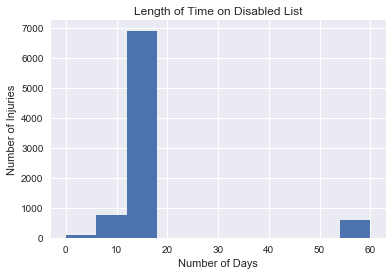

In [180]:
plt.hist(injury_df.DL_length)
plt.title('Length of Time on Disabled List')
plt.xlabel('Number of Days')
plt.ylabel('Number of Injuries')

In [197]:
import datetime
injury_df['Date'] = pd.to_datetime(injury_df.Date)

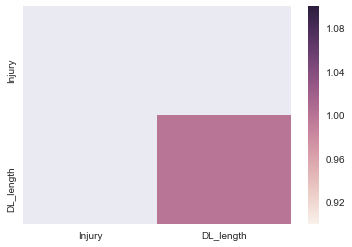

In [199]:
sns.heatmap(injury_df.corr())

## Next Steps: 
* Plot some of the injury data by teams to see what patterns emerge related to injuries for certain teams.
* Match the `'Team'` string with the `team_id` from mlbgame

We want to see if some teams have had more injuries than other teams... 


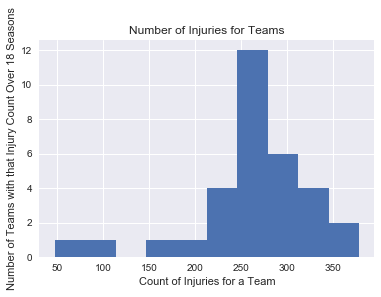

In [246]:
team_injuries = pd.DataFrame(injury_df.Team.value_counts().reset_index())
team_injuries.columns = ['team', 'count']
team_injuries.count = team_injuries['count'].astype(np.int64)
print('We want to see if some teams have had more injuries than other teams... ')
plt.hist(team_injuries['count'])
plt.title('Number of Injuries for Teams')
plt.xlabel('Count of Injuries for a Team')
plt.ylabel('Number of Teams with that Injury Count Over 18 Seasons')

In [248]:
# Grabbing team info from mlbgame class Info to create a dictionary:
team_info = []
for thing in mlbgame.teams():
    team_info_dict = {}
    team_info_dict['team_id'] = thing.team_id
    team_info_dict['team_full_name'] = thing.club_full_name
    team_info_dict['division'] = thing.division
    team_info_dict['league'] = thing.league
    team_info_dict['club_id'] = thing.club_id
    team_info_dict['hist_team_code'] = thing.historical_team_code
    team_info_dict['twitter'] = thing.twitter
    team_info_dict['timezone'] = thing.timezone
    team_info_dict['home_location'] = thing.city
    team_info.append(team_info_dict)
teams_df = pd.DataFrame(team_info)

In [249]:
teams_df.head()

,club_id,division,hist_team_code,home_location,league,team_full_name,team_id,timezone,twitter
0,3,West,ARI,Phoenix,National,Arizona Diamondbacks,109,MST,Dbacks
1,4,East,BS1,Atlanta,National,Atlanta Braves,144,ET,Braves
2,5,East,MLA,Baltimore,American,Baltimore Orioles,110,ET,Orioles
3,6,East,BOS,Boston,American,Boston Red Sox,111,ET,redsox
4,7,Central,CH2,Chicago,National,Chicago Cubs,112,CT,Cubs


In [255]:
def map_team_id(team, dictdf):
    """Function maps the team_id back to the injury df"""
    return
        

In [254]:
# For the injury dataset, I want to add the team_id but the injury_df 'Team'
# column is a shortened version of teams_df.team_full_name, so I'll have to do some
# snaggling.
injury_df['team_id'] = pd.Series()
for idx, i in enumerate(injury_df.Team):
    print(idx)
    for jdx, j in enumerate(teams_df.team_full_name):
        if i in j:
            injury_df['team_id'][idx] = teams_df['team_full_name'][jdx]


0


/Users/freedom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/freedom/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


In [257]:
# Once I've done this horribly time-intensive process, let's create a CSV.
# injury_df.to_csv('injury_with_team_id')